# Summary

1. energy_per_atom을 target property로 하여 약 27000개의 material project 데이터로 학습
2. SrTiO3의 Ti 원자의 위치를 변경해가며 이에 따른 energy_per_atom 변화곡선을 그림
3. 예전에는 DFT 결과와 모양은 비슷하게 나왔는데, 다시하니까 안된다;;



# Google Drive Mount

In [106]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/cgcnn


In [108]:
ls

cgcnn/               model_best2.pth.tar        pre-trained/
checkpoint2.pth.tar  model_best.pth.tar         README.md
checkpoint.pth.tar   new_SrTiO3_Ti_delta_0.cif  SrTiO3_testdata/
data/                new_SrTiO3_Ti_delta_1.cif  test_results.csv
LICENSE              new_SrTiO3_Ti_delta_2.cif
main.py              predict.py


# CGCNN github clone

In [109]:
#!git clone https://github.com/txie-93/cgcnn

# Pymatgen Install

In [110]:
!pip install pymatgen==2020.11.11

In [111]:
cd /content/drive/My Drive/cgcnn/data/material-data

/content/drive/My Drive/cgcnn/data/material-data


In [112]:
ls

mp_data-27430.pickle  mp-ids-27430.csv  mp-ids-46744.csv
mp_data-46744.pickle  mp-ids-3402.csv   README.md


# material project id collection

In [113]:
import pandas as pd
import numpy as np

cgcnn 저자가 제공하는 27430개의 materials project id를 사용한다.

In [114]:
material_project_ids = pd.read_csv('mp-ids-27430.csv', header = None)
material_project_ids = np.array(material_project_ids).reshape(-1)
print(material_project_ids)
print(len(material_project_ids))

['mp-754118' 'mp-633688' 'mp-3799' ... 'mp-652776' 'mp-755142' 'mp-648469']
27430


In [115]:
material_project_ids[2]

'mp-3799'

# Custom Dataset Generation

In [116]:
from pymatgen.ext.matproj import MPRester
from tqdm import tqdm
import pickle

27430개의 materials project ids.csv 파일에서 energy_per_atom과 structure 정보를 읽어 data에 저장한다.

In [117]:
'''
data = {}
my_API_key = "pyvjZNMMGjtZskXhTQb"

with MPRester(my_API_key) as m:

    for mp_id in tqdm(material_project_ids):
        # target propery : energy_per_atom
        # number of data : about 20000
        data[mp_id] = (m.query(criteria = {'material_id': mp_id},
                               properties = ['energy_per_atom', 'structure']))
'''

'\ndata = {}\nmy_API_key = "pyvjZNMMGjtZskXhTQb"\n\nwith MPRester(my_API_key) as m:\n\n    for mp_id in tqdm(material_project_ids):\n        # target propery : energy_per_atom\n        # number of data : about 20000\n        data[mp_id] = (m.query(criteria = {\'material_id\': mp_id},\n                               properties = [\'energy_per_atom\', \'structure\']))\n'

매번 target propery를 읽어오는 것은 시간이 오래 걸리므로 pickle로 저장해둔다.

In [118]:
# save data
#with open('energy_per_atom_27430.pickle','wb') as fw:
#    pickle.dump(data, fw)

데이터 재사용시에는 load data 사용

In [119]:
# load data
with open('mp_data-27430.pickle', 'rb') as fr:
    data = pickle.load(fr)

In [120]:
data['mp-1000']

[{'energy_per_atom': -4.32347309, 'structure': Structure Summary
  Lattice
      abc : 5.013215958771575 5.013215958771575 5.013215958771575
   angles : 60.00000000000001 60.00000000000001 60.00000000000001
   volume : 89.09108390126052
        A : 0.0 3.544879 3.544879
        B : 3.544879 0.0 3.544879
        C : 3.544879 3.544879 0.0
  PeriodicSite: Ba (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
  PeriodicSite: Te (3.5449, 3.5449, 3.5449) [0.5000, 0.5000, 0.5000]}]

Custom Dataset으로 CGCNN 코드를 작동시킬 경우, 실질적으로 2개의 데이터를 새로 생성해야 한다. 

1. new_id_prop_data
2. new_crystal

In [121]:
# 1. new_id_prop_data 생성
new_id_prop_data = []

for key, value in data.items():

    if value == []:
        pass
    else:
        new_id_prop_data.append([key, value[0]['energy_per_atom']])

In [122]:
print('실제 유의미한 데이터의 수 : {}'.format(len(new_id_prop_data)))

실제 유의미한 데이터의 수 : 19966


In [123]:
# 2. new_crystal 생성
idx = 2
cif_id, target = new_id_prop_data[idx]
print('cif_id: {}'.format(cif_id))
print('target: {}'.format(target))

cif_id: mp-12487
target: -3.7223578083333333


In [124]:
new_crystal_structure = data[cif_id][0]['structure']
new_crystal_structure

Structure Summary
Lattice
    abc : 8.985792534516808 8.985792534516808 11.889019
 angles : 90.0 90.0 150.6870489721173
 volume : 469.9829181504342
      A : 2.273613 -8.693397 0.0
      B : 2.273613 8.693397 0.0
      C : 0.0 0.0 11.889019
PeriodicSite: Cs (2.2736, 4.3640, 2.9723) [0.2490, 0.7510, 0.2500]
PeriodicSite: Cs (2.2736, -4.3640, 8.9168) [0.7510, 0.2490, 0.7500]
PeriodicSite: Dy (0.0000, 0.0000, 5.9445) [0.0000, 0.0000, 0.5000]
PeriodicSite: Dy (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (2.2736, -0.6417, 2.9723) [0.5369, 0.4631, 0.2500]
PeriodicSite: Cd (2.2736, 0.6417, 8.9168) [0.4631, 0.5369, 0.7500]
PeriodicSite: Te (2.2736, 2.0830, 6.4966) [0.3802, 0.6198, 0.5464]
PeriodicSite: Te (2.2736, -2.0830, 5.3924) [0.6198, 0.3802, 0.4536]
PeriodicSite: Te (2.2736, -2.0830, 0.5521) [0.6198, 0.3802, 0.0464]
PeriodicSite: Te (2.2736, 2.0830, 11.3369) [0.3802, 0.6198, 0.9536]
PeriodicSite: Te (2.2736, -7.5590, 2.9723) [0.9348, 0.0652, 0.2500]
PeriodicSite: Te

## cgcnn/cgcnn/data.py

In [125]:
from __future__ import print_function, division

import csv
import functools
import json
import os
import random
import warnings

import numpy as np
import torch
from pymatgen.core.structure import Structure
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataloader import default_collate
from torch.utils.data.sampler import SubsetRandomSampler

### get_train_val_test_loader

In [126]:
def get_train_val_test_loader(dataset, collate_fn = default_collate,
                              batch_size = 64, train_ratio = None,
                              val_ratio = 0.1, test_ratio = 0.1, return_test = False,
                              num_workers = 1, pin_memory = False, **kwargs):
    """
    Utility function for dividing a dataset to train, val, test datasets.
    !!! The dataset needs to be shuffled before using the function !!!

    Parameters
    ----------
    dataset: torch.utils.data.Dataset
             The full dataset to be divided.
    collate_fn: torch.utils.data.DataLoader
    batch_size: int
    train_ratio: float
    val_ratio: float
    test_ratio: float
    return_test: bool
        Whether to return the test dataset loader. If False, the last test_size 
        data will be hidden.
    num_workers: int
    pin_memory: bool

    Returns
    -------
    train_loader: torch.utils.data.DataLoader
        DataLoader that random samples the training data.
    val_loader: torch.utils.data.DataLoader
        DataLoader that random samples the validation data.
    (test_loader): torch.utils.data.DataLoader
        DataLoader that random samples the test data, returns if
        return_test = True.
    """
    total_size = len(dataset)

    if train_ratio is None:
        assert val_ratio + test_ratio < 1
        train_ratio = 1 - val_ratio - test_ratio
        print('[Warning] train_ratio is None, using all training data.')
    else:
        assert train_ratio + val_ratio + test_ratio <= 1
    
    indices = list(range(total_size))

    if kwargs['train_size']:
        train_size = kwargs['train_size']
    else:
        train_size = int(train_ratio * total_size)

    if kwargs['test_size']:
        test_size = kwargs['test_size']
    else:
        test_size = int(test_ratio * total_size)
    
    if kwargs['val_size']:
        valid_size = kwargs['val_size']
    else:
        valid_size = int(val_ratio * total_size)

    train_sampler = SubsetRandomSampler(indices[:train_size])
    val_sampler = SubsetRandomSampler(
        indices[-(valid_size + test_size):-test_size])
    
    if return_test:
        test_sampler = SubsetRandomSampler(indices[-test_size:])

    train_loader = DataLoader(dataset, batch_size = batch_size,
                              sampler = train_sampler,
                              num_workers = num_workers,
                              collate_fn = collate_fn, pin_memory = pin_memory)
    val_loader = DataLoader(dataset, batch_size = batch_size,
                            sampler = val_sampler,
                            num_workers = num_workers,
                            collate_fn = collate_fn, pin_memory = pin_memory)
    if return_test:
        test_loader = DataLoader(dataset, batch_size = batch_size,
                                 sampler = test_sampler,
                                 num_workers = num_workers,
                                 collate_fn = collate_fn, pin_memory = pin_memory)
    if return_test:
        return train_loader, val_loader, test_loader
    else:
        return train_loader, val_loader 
        

### collate_pool

In [127]:
def collate_pool(dataset_list):
    """
    Collate a list of data and return a batch for predicting crystal properties.

    Parameters
    ----------
    dataset_list: list of tuples for each data point.
        (atom_fea, nbr_fea, nbr_fea_idx, target)

        atom_fea: torch.Tensor shape (n_i, atom_fea_len)
        nbr_fea: torch.Tensor shape (n_i, M, nbr_fea_len)
        nbr_fea_idx: torch.LongTensor shape (n_i, M)
        target: torch.Tensor shape (1, )
        cif_id: str or int

    Returns
    -------
    N = sum(n_i); N0 = sum(i)

    batch_atom_fea: torch.Tensor shape (N, orig_atom_fea_len)
        Atom features from atom type
    batch_nbr_fea: torch.Tensor shape (N, M, nbr_fea_len)
        Bond features of each atom's M neighbors
    batch_nbr_fea_idx: torch.LongTensor shape (N, M)
        Indices of M neighbors of each atom
    crystal_atom_idx: list of torch.LongTensor of length N0
        Mapping from the crystal idx to atom idx
    target: torch.Tensor shape (N, 1)
        Target value for prediction
    batch_cif_ids: list
    """
    batch_atom_fea, batch_nbr_fea, batch_nbr_fea_idx = [], [], []
    crystal_atom_idx, batch_target = [], []
    batch_cif_ids = []
    base_idx = 0

    for i, ((atom_fea, nbr_fea, nbr_fea_idx), target, cif_id) in enumerate(dataset_list):

        n_i = atom_fea.shape[0]  # number of atoms for this crystal
        
        batch_atom_fea.append(atom_fea)
        batch_nbr_fea.append(nbr_fea)
        batch_nbr_fea_idx.append(nbr_fea_idx + base_idx)

        new_idx = torch.LongTensor(np.arange(n_i) + base_idx)

        crystal_atom_idx.append(new_idx)
        batch_target.append(target)
        batch_cif_ids.append(cif_id)

        base_idx += n_i

    return (torch.cat(batch_atom_fea, dim = 0),
            torch.cat(batch_nbr_fea, dim = 0),
            torch.cat(batch_nbr_fea_idx, dim = 0),
            crystal_atom_idx), \
            torch.stack(batch_target, dim = 0), \
            batch_cif_ids


### GaussianDistance

In [128]:
class GaussianDistance(object):
    """
    Expands the distance by Gaussian basis.

    Unit: angstrom
    """
    def __init__(self, dmin, dmax, step, var = None):
        """
        Parameters
        ----------
        dmin: float
            Minimum interatomic distance
        dmax: float
            Maximum interatomic distance
        step: float
            Step size for the Gaussian filter
        """
        assert dmin < dmax
        assert dmax - dmin > step
        self.filter = np.arange(dmin, dmax + step, step)
        if var is None:
            var = step
        self.var = var

    def expand(self, distances):
        """
        Apply Gaussian distances filter to a numpy distance array

        Parameters
        ----------
        distance: np.array shape n-d array
            A distance matrix of any shape
        
        Returns
        -------
        expanded_distance: shape (n+1)-d array
            Expanded distance matrix with the last dimension of length
            len(self.filter)
        """
        return np.exp(-(distances[..., np.newaxis] - self.filter)**2 / self.var**2)
        

### AtomInitializer

In [129]:
class AtomInitializer(object):
    """
    Base class for initializing the vector representation for atoms.
    !!! Use one AtomInitializer per dataset !!!
    """
    def __init__(self, atom_types):
        self.atom_types = set(atom_types)
        self._embedding = {}

    def get_atom_fea(self, atom_type):
        assert atom_type in self.atom_types
        return self._embedding[atom_type]

    def load_state_dict(self, state_dict):
        self._embedding = state_dict
        self.atom_types = set(self._embedding.keys())
        self._decodedict = {idx: atom_type for atom_type, idx in 
                            self._embedding.items()}

    def state_dict(self):
        return self._embedding

    def decode(self, idx):
        if not hasattr(self, '_decodedict'):
            self._decodedict = {idx: atom_type for atom_type, idx in 
                                self._embedding.items()}
        return self._decodedict[idx]
        

### AtomCustomJSONInitializer

In [130]:
class AtomCustomJSONInitializer(AtomInitializer):
    """
    Initialize atom feature vectors using a JSON file, which is a python
    dictionary mapping from element number to a list representing the 
    feature vector of the element.

    Parameters
    ----------
    elem_embedding_file: str
        The path to the .json file
    """
    def __init__(self, elem_embedding_file):
        with open(elem_embedding_file) as f:
            elem_embedding = json.load(f)
        elem_embedding = {int(key): value for key, value
                          in elem_embedding.items()}
        atom_types = set(elem_embedding.keys())
        super(AtomCustomJSONInitializer, self).__init__(atom_types)
        for key, value in elem_embedding.items():
            self._embedding[key] = np.array(value, dtype = float)
            

### CIFData

In [131]:
class CIFData(Dataset):
    """
    The CIFData dataset is a wrapper for a dataset where the crystal structures
    are stored in the form of CIF files. The dataset should have the following 
    directory structure:

    root_dir
    ├── id_prop.csv
    ├── atom_init.json
    ├── id0.cif
    ├── id1.cif
    ├── ...

    id_prop.csv: a CSV file with two columns. The first column recodes a 
    unique ID for each crystal, and the second column recodes the value of
    target property.

    atom_init.json: a JSON file that stores the initialization vector for each
    element.

    ID.cif: a CIF file that recodes the crystal structure, where ID is the
    unique ID for the crystal.

    Parameters
    ----------
    root_dir: str
        The path to the root directory of the dataset
    max_num_nbr: int
        The maximum number of neighbors while constructing the crystal graph
    radius: float
        The cutoff radius for searching neighbors
    dmin: float
        The minimum distance for constructing GaussianDistance
    step: float
        The step size for constructing GaussianDistance
    random_seed: int
        Random seed for shuffling the dataset

    Returns
    -------
    atom_fea: torch.Tensor shape (n_i, atom_fea_len)
    nbr_fea: torch.Tensor shape (n_i, M, nbr_fea_len)
    nbr_fea_idx: torch.LongTensor shape (n_i, M)
    target: torch.Tensor shape (1, )
    cif_id: str or int
    """
    def __init__(self, root_dir, max_num_nbr = 12, radius = 8, dmin = 0, step = 0.2,
                 random_seed = 123):
        self.root_dir = root_dir
        self.max_num_nbr, self.radius = max_num_nbr, radius

        assert os.path.exists(root_dir), 'root_dir does not exist!'
        id_prop_file = os.path.join(self.root_dir, 'id_prop.csv')
        assert os.path.exists(id_prop_file), 'id_prop.csv does not exist!'

        with open(id_prop_file) as f:
            reader = csv.reader(f)
        #    self.id_prop_data = [row for row in reader]
        # ==================================
        self.id_prop_data = new_id_prop_data # Custom dataset 입력
        # ==================================
        
        random.seed(random_seed)
        random.shuffle(self.id_prop_data)

        atom_init_file = os.path.join(self.root_dir, 'atom_init.json')
        assert os.path.exists(atom_init_file), 'atom_init.json does not exist!'
        
        self.ari = AtomCustomJSONInitializer(atom_init_file)
        self.gdf = GaussianDistance(dmin = dmin, dmax = self.radius, step = step)

    def __len__(self):
        return len(self.id_prop_data)

    @functools.lru_cache(maxsize = None)  # Cache loaded structures
    def __getitem__(self, idx):
        cif_id, target = self.id_prop_data[idx]
        #crystal = Structure.from_file(os.path.join(self.root_dir, cif_id + '.cif'))
        
        # ====================================
        crystal = data[cif_id][0]['structure'] # Custom dataset 입력
        # ====================================
        
        atom_fea = np.vstack([self.ari.get_atom_fea(crystal[i].specie.number)
                              for i in range(len(crystal))])
        atom_fea = torch.Tensor(atom_fea)

        all_nbrs = crystal.get_all_neighbors(self.radius, include_index = True)
        all_nbrs = [sorted(nbrs, key = lambda x: x[1]) for nbrs in all_nbrs]

        nbr_fea_idx, nbr_fea = [], []
        for nbr in all_nbrs:
            if len(nbr) < self.max_num_nbr:
                warnings.warn('{} not find enough neighbors to build graph. '
                              'If it happens frequently, consider increase '
                              'radius.'.format(cif_id))
                nbr_fea_idx.append(list(map(lambda x: x[2], nbr)) +
                                   [0] * (self.max_num_nbr - len(nbr)))
                nbr_fea.append(list(map(lambda x: x[1], nbr)) + 
                               [self.radius + 1.] * (self.max_num_nbr - len(nbr)))
            else:
                nbr_fea_idx.append(list(map(lambda x: x[2],
                                            nbr[:self.max_num_nbr])))
                nbr_fea.append(list(map(lambda x: x[1], 
                                        nbr[:self.max_num_nbr])))
                
        nbr_fea_idx, nbr_fea = np.array(nbr_fea_idx), np.array(nbr_fea)
        nbr_fea = self.gdf.expand(nbr_fea)
        atom_fea = torch.Tensor(atom_fea)
        nbr_fea = torch.Tensor(nbr_fea)
        nbr_fea_idx = torch.LongTensor(nbr_fea_idx)
        target = torch.Tensor([float(target)])

        return (atom_fea, nbr_fea, nbr_fea_idx), target, cif_id


## cgcnn/cgcnn/model.py

In [132]:
from __future__ import print_function, division

import torch
import torch.nn as nn

### ConvLayer

In [133]:
class ConvLayer(nn.Module):
    """
    Convolutional operation on graphs
    """
    def __init__(self, atom_fea_len, nbr_fea_len):
        """
        Initialize ConvLayer.

        Parameters
        ----------
        atom_fea_len: int
            Number of atom hidden features.
        nbr_fea_len: int
            Number of bond features.
        """
        super(ConvLayer, self).__init__()
        self.atom_fea_len = atom_fea_len
        self.nbr_fea_len = nbr_fea_len
        self.fc_full = nn.Linear(2 * self.atom_fea_len + self.nbr_fea_len,
                                 2 * self.atom_fea_len)
        self.sigmoid = nn.Sigmoid()
        self.softplus1 = nn.Softplus()
        self.bn1 = nn.BatchNorm1d(2 * self.atom_fea_len)
        self.bn2 = nn.BatchNorm1d(self.atom_fea_len)
        self.softplus2 = nn.Softplus()

    def forward(self, atom_in_fea, nbr_fea, nbr_fea_idx):
        """
        Forward pass

        N: Total number of atoms in the batch
        M: Max number of neighbors

        Parameters
        ----------
        atom_in_fea: Variable(torch.Tensor) shape (N, atom_fea_len)
            Atom hidden features before convolution
        nbr_fea: Variable(torch.Tensor) shape (N, M, nbr_fea_len)
            Bond features of each atom's M neighbors
        nbr_fea_idx: torch.LongTensor shape (N, M)
            Indices of M neighbors of each atom
        
        Returns
        -------
        atom_out_fea: nn.Variable shape (N, atom_fea_len)
            Atom hidden features after convolution
        """
        # TODO will there be problems with the index zero padding?
        N, M = nbr_fea_idx.shape

        # convolution
        atom_nbr_fea = atom_in_fea[nbr_fea_idx, :]
        total_nbr_fea = torch.cat(
            [atom_in_fea.unsqueeze(1).expand(N, M, self.atom_fea_len),
             atom_nbr_fea, nbr_fea], dim = 2)
        
        total_gated_fea = self.fc_full(total_nbr_fea)
        total_gated_fea = self.bn1(total_gated_fea.view(
            -1, self.atom_fea_len * 2)).view(N, M, self.atom_fea_len * 2)
        
        nbr_filter, nbr_core = total_gated_fea.chunk(2, dim = 2)
        nbr_filter = self.sigmoid(nbr_filter)
        nbr_core = self.softplus1(nbr_core)
        nbr_sumed = torch.sum(nbr_filter * nbr_core, dim = 1)
        nbr_sumed = self.bn2(nbr_sumed)
        out = self.softplus2(atom_in_fea + nbr_sumed)

        return out

### CrystalGraphConvNet

In [134]:
class CrystalGraphConvNet(nn.Module):
    """
    Create a crystal graph convolutional neural network for predicting total
    material properties.
    """
    def __init__(self, orig_atom_fea_len, nbr_fea_len,
                 atom_fea_len = 64, n_conv = 3, h_fea_len = 128, n_h = 1,
                 classification = False):
        """
        Initialize CrystalGraphConvNet.

        Parameters
        ----------
        orig_atom_fea_len: int
            Number of atom features in the input.
        nbr_fea_len: int
            Number of bond features.
        atom_fea_len: int
            Number of hidden atom features in the convolutional layers
        n_conv: int
            Number of convolutional layers
        h_fea_len: int
            Number of hidden features after pooling
        n_h: int
            Number of hidden layers after pooling
        """
        super(CrystalGraphConvNet, self).__init__()
        self.classification = classification 
        self.embedding = nn.Linear(orig_atom_fea_len, atom_fea_len)
        self.convs = nn.ModuleList([ConvLayer(atom_fea_len = atom_fea_len,
                                              nbr_fea_len = nbr_fea_len)
                                              for _ in range(n_conv)])
        self.conv_to_fc = nn.Linear(atom_fea_len, h_fea_len)
        self.conv_to_fc_softplus = nn.Softplus()

        if n_h > 1:
            self.fcs = nn.ModuleList([nn.Linear(h_fea_len, h_fea_len)
                                      for _ in range(n_h - 1)])
            self.softpluses = nn.ModuleList([nn.Softplus()
                                             for _ in range(n_h - 1)])
        
        if self.classification:
            self.fc_out = nn.Linear(h_fea_len, 2)
        else:
            self.fc_out = nn.Linear(h_fea_len, 1)
        
        if self.classification:
            self.logsoftmax = nn.LogSoftmax(dim = 1)
            self.dropout = nn.Dropout()

    def forward(self, atom_fea, nbr_fea, nbr_fea_idx, crystal_atom_idx):
        """
        Forward pass

        N: Total number of atoms in the batch
        M: Max number of neighbors
        N0: Total number of crystals in the batch

        Parameters
        ----------
        atom_fea: Variable(torch.Tensor) shape (N, orig_atom_fea_len)
            Atom features from atom type
        nbr_fea: Variable(torch.Tensor) shape (N, M, nbr_fea_len)
            Bond features of each atom's M neighbors
        nbr_fea_idx: torch.LongTensor shape (N, M)
            Indices of M neighbors of each atom
        crystal_atom_idx: list of torch.LongTensor of length N0
            Mapping from the crystal idx to atom idx

        Returns
        -------
        prediction: nn.Variable shape (N, )
            Atom hidden features after convolution
        """
        atom_fea = self.embedding(atom_fea)
        for conv_func in self.convs:
            atom_fea = conv_func(atom_fea, nbr_fea, nbr_fea_idx)
        
        crys_fea = self.pooling(atom_fea, crystal_atom_idx)
        crys_fea = self.conv_to_fc(self.conv_to_fc_softplus(crys_fea))
        crys_fea = self.conv_to_fc_softplus(crys_fea)

        if self.classification:
            crys_fea = self.dropout(crys_fea)
        
        if hasattr(self, 'fcs') and hasattr(self, 'softpluses'):
            for fc, softplus in zip(self.fcs, self.softpluses):
                crys_fea = softplus(fc(crys_fea))
        
        out = self.fc_out(crys_fea)

        if self.classification:
            out = self.logsoftmax(out)
        
        return out

    def pooling(self, atom_fea, crystal_atom_idx):
        """
        Pooling the atom features to crystal features

        N: Total number of atoms in the batch
        N0: Total number of crystals in the batch

        Parameters
        ----------
        atom_fea: Variable(torch.Tensor) shape (N, atom_fea_len)
            Atom feature vectors of the batch
        crystal_atom_idx: list of torch.LongTensor of length N0
            Mapping from the crystal idx to atom idx
        """
        assert sum([len(idx_map) for idx_map in crystal_atom_idx]) == \
            atom_fea.data.shape[0]
        summed_fea = [torch.mean(atom_fea[idx_map], dim = 0, keepdim = True)
                      for idx_map in crystal_atom_idx]
        return torch.cat(summed_fea, dim = 0)


## cgcnn/main.py

In [135]:
import argparse
import os
import shutil
import sys
import time
import warnings
from random import sample

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from torch.autograd import Variable
from torch.optim.lr_scheduler import MultiStepLR

#from cgcnn.data import CIFData
#from cgcnn.data import collate_pool, get_train_val_test_loader
#from cgcnn.model import CrystalGraphConvNet

### Args

In [136]:
class Args:
    def __init__(self):

        self.data_options = './data/sample-regression'
        self.task = 'regression' 
        self.disable_cuda = False # help = Disable CUDA, action = 'store_ture'
        self.workers = 0
        self.epochs = 30
        self.start_epoch = 0
        self.batch_size = 256
        self.lr = 0.01
        self.lr_milestones = [100]
        self.momentum = 0.9
        self.weight_decay = 0
        self.print_freq = 10
        self.resume = None # default = '', help = path to latest checkpoint(default:None)

        # train_group
        self.train_ratio = None 
        self.train_size = None

        # valid_group
        self.val_ratio = 0.1 
        self.val_size = 1000 

        # test_group : add_mutually_exclusive_group
        self.test_ratio = 0.1 
        self.test_size = 1000 
        self.optim = 'Adam'
        self.atom_fea_len = 64 
        self.h_fea_len = 128
        self.n_conv = 3
        self.n_h = 1
args=Args()
args

In [137]:
args.cuda = not args.disable_cuda and torch.cuda.is_available()
print(args.cuda) # True if GPU on

True


In [138]:
if args.task == 'regression':
    best_mae_error = 1e10
else:
    best_mae_error = 0.0

print(best_mae_error)

10000000000.0


### Normalizer

In [139]:
class Normalizer(object):
    """ Normalize a Tensor and restore it later. """

    def __init__(self, tensor):
        """ tensor is taken as a sample to calculate the mean and std """
        self.mean = torch.mean(tensor)
        self.std = torch.std(tensor)

    def norm(self, tensor):
        return (tensor - self.mean) / self.std
    
    def denorm(self, normed_tensor):
        return normed_tensor * self.std + self.mean

    def state_dict(self):
        return {'mean': self.mean, 
                'std': self.std}
    
    def load_state_dict(self, state_dict):
        self.mean = state_dict['mean']
        self.std = state_dict['std']
        

### mae

In [140]:
def mae(prediction, target):
    """
    Computes the mean absolute error between prediction and target

    Parameters
    ----------
    prediction: torch.Tensor (N, 1)
    target: torch.Tensor (N, 1)
    """
    return torch.mean(torch.abs(target - prediction))

### class_eval

In [141]:
def class_eval(prediction, target):

    prediction = np.exp(prediction.numpy())
    target = target.numpy()

    pred_label = np.argmax(prediction, axis = 1)
    target_label = np.squeeze(target)

    if not target_label.shape:
        target_label = np.asarray([target_label])
    
    if prediction.shape[1] == 2:
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(
            target_label, pred_label, average = 'binary')
        auc_score = metrics.roc_auc_score(target_label, prediction[:, 1])
        accuracy = metrics.accuracy_score(target_label, pred_label)
    else:
        raise NotImplementedError
    return accuracy, precision, recall, fscore, auc_score

### AverageMeter

In [142]:
class AverageMeter(object):
    """ Computes and stores the average and current value """
    
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n = 1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### save_checkpoint

In [143]:
def save_checkpoint(state, is_best, filename="checkpoint.pth.tar"):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

### adjust_learning_rate

In [144]:
def adjust_learning_rate(optimizer, epoch, k):
    """ Sets the learning rate to the initial LR decayed by 10 every k epochs """
    assert type(k) is int
    lr = args.lr * (0.1 ** (epoch // k))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
        

### train

In [145]:
def train(train_loader, model, criterion, optimizer, epoch, normalizer):

    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()

    if args.task == 'regression':
        mae_errors = AverageMeter()
    else:
        accuracies = AverageMeter()
        precisions = AverageMeter()
        recalls = AverageMeter()
        fscores = AverageMeter()
        auc_scores = AverageMeter()
    
    # switch to train mode
    model.train()

    end = time.time()

    for i, (input, target, _) in enumerate(train_loader):

        # measure data loading time
        data_time.update(time.time() - end)

        if args.cuda:
            input_var = (Variable(input[0].cuda(non_blocking = True)),
                         Variable(input[1].cuda(non_blocking = True)),
                         input[2].cuda(non_blocking = True),
                         [crys_idx.cuda(non_blocking = True) for crys_idx in input[3]])
        else:
            input_var = (Variable(input[0]),
                         Variable(input[1]),
                         input[2],
                         input[3])
        
        # normalize target
        if args.task == 'regression':
            target_normed = normalizer.norm(target)
        else:
            target_normed = target.view(-1).long()
        
        if args.cuda:
            target_var = Variable(target_normed.cuda(non_blocking = True))
        else:
            target_var = Variable(target_normed)

        # compute output
        output = model(*input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        if args.task == 'regression':
            mae_error = mae(normalizer.denorm(output.data.cpu()), target)
            losses.update(loss.data.cpu(), target.size(0))
            mae_errors.update(mae_error, target.size(0))
        else:
            accuracy, precision, recall, fscore, auc_score = \
                class_eval(output.data.cpu(), target)
            losses.update(loss.data.cpu().item(), target.size(0))
            accuracies.update(accuracy, target.size(0))
            precisions.update(precision, target.size(0))
            recalls.update(recall, target.size(0))
            fscores.update(fscore, target.size(0))
            auc_scores.update(auc_score, target.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            if args.task == 'regression':
                print('Epoch: [{0}][{1}/{2}]\t'
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                      'MAE {mae_errors.val:.3f} ({mae_errors.avg:.3f})'.format(
                          epoch, i, len(train_loader), batch_time = batch_time,
                          data_time = data_time, loss = losses, mae_errors = mae_errors))
            else:
                print('Epoch: [{0}][{1}/{2}]\t'
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                      'Accu {accu.val:.3f} ({accu.avg:.3f})\t'
                      'Precision {prec.val:.3f} ({prec.avg:.3f})\t'
                      'Recall {recall.val:.3f} ({recall.avg:.3f})\t'
                      'F1 {f1.val:.3f} ({f1.avg:.3f})\t'
                      'AUC {auc.val:.3f} ({auc.avg:.3f})'.format(
                          epoch, i, len(train_loader), batch_time = batch_time,
                          data_time = data_time, loss = losses, accu = accuracies,
                          prec = precisions, recall = recalls, f1 = fscores,
                          auc = auc_scores))


### validate

In [146]:
def validate(val_loader, model, criterion, normalizer, test = False):

    batch_time = AverageMeter()
    losses = AverageMeter()

    if args.task == 'regression':
        mae_errors = AverageMeter()
    else:
        accuracies = AverageMeter()
        precisions = AverageMeter()
        recalls = AverageMeter()
        fscores = AverageMeter()
        auc_scores = AverageMeter()
    
    if test:
        test_targets = []
        test_preds = []
        test_cif_ids = []

    # switch to evaluate mode
    model.eval()

    end = time.time()

    for i, (input, target, batch_cif_ids) in enumerate(val_loader):

        if args.cuda:
            with torch.no_grad():
                input_var = (Variable(input[0].cuda(non_blocking = True)),
                             Variable(input[1].cuda(non_blocking = True)),
                             input[2].cuda(non_blocking = True),
                             [crys_idx.cuda(non_blocking = True) for crys_idx in input[3]])
        else:
            with torch.no_grad():
                input_var = (Variable(input[0]),
                             Variable(input[1]),
                             input[2],
                             input[3])
        if args.task == 'regression':
            target_normed = normalizer.norm(target)
        else:
            target_normed = target.view(-1).long()

        if args.cuda:
            with torch.no_grad():
                target_var = Variable(target_normed.cuda(non_blocking = True))
        else:
            with torch.no_grad():
                target_var = Variable(target_normed)
        
        # compute output
        output = model(*input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        if args.task == 'regression':
            mae_error = mae(normalizer.denorm(output.data.cpu()), target)
            losses.update(loss.data.cpu().item(), target.size(0))
            mae_errors.update(mae_error, target.size(0))

            if test:
                test_pred = normalizer.denorm(output.data.cpu())
                test_target = target
                test_preds += test_pred.view(-1).tolist()
                test_targets += test_target.view(-1).tolist()
                test_cif_ids += batch_cif_ids
        else:
            accuracy, precision, recall, fscore, auc_score = \
                class_eval(output.data.cpu(), target)
            
            losses.update(loss.data.cpu().item(), target.size(0))
            accuracies.update(accuracy, target.size(0))
            precisions.update(precision, target.size(0))
            recalls.update(recall, target.size(0))
            fscores.update(fscore, target.size(0))
            auc_scores.update(auc_score, target.size(0))

            if test:
                test_pred = torch.exp(output.data.cpu())
                test_target = target
                assert test_pred.shape[1] == 2
                test_preds += test_pred[:, 1].tolist()
                test_targets += test_target.view(-1).tolist()
                test_cif_ids += batch_cif_ids
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            if args.task == 'regression':
                print('Test: [{0}/{1}]\t'
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                      'MAE {mae_errors.val:.3f} ({mae_errors.avg:.3f})'.format(
                          i, len(val_loader), batch_time = batch_time, loss = losses,
                          mae_errors = mae_errors))
            else:
                print('Test: [{0}/{1}]\t'
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                      'Accu {accu.val:.3f} ({accu.avg:.3f})\t'
                      'Precision {prec.val:.3f} ({prec.avg:.3f})\t'
                      'Recall {recall.val:.3f} ({recall.avg:.3f})\t'
                      'F1 {f1.val:.3f} ({f1.avg:.3f})\t'
                      'AUC {auc.val:.3f} ({auc.avg:.3f})'.format(
                          i, len(val_loader), batch_time = batch_time, loss = losses,
                          accu = accuracies, prec = precisions, recall = recalls,
                          f1 = fscores, auc = auc_scores))                
    if test:
        star_label = '**'
        import csv
        with open('test_results.csv', 'w') as f:
            writer = csv.writer(f)

            for cif_id, target, pred in zip(test_cif_ids, test_targets, test_preds):
                writer.writerow((cif_id, target, pred))
    else:
        star_label = '*'


    if args.task == 'regression':
        print(' {star} MAE {mae_errors.avg:.3f}'.format(star = star_label,
                                                        mae_errors = mae_errors))
        return mae_errors.avg
    else:
        print(' {star} AUC {auc.avg:.3f}'.format(star = star_label,
                                                 auc = auc_scores))
        return auc_scores.avg
        

### main()

In [147]:
global args, best_mae_error
print(args)
print(best_mae_error)

10000000000.0


In [148]:
cd /content/drive/My Drive/cgcnn/ 

/content/drive/My Drive/cgcnn


In [149]:
ls

cgcnn/               model_best2.pth.tar        pre-trained/
checkpoint2.pth.tar  model_best.pth.tar         README.md
checkpoint.pth.tar   new_SrTiO3_Ti_delta_0.cif  SrTiO3_testdata/
data/                new_SrTiO3_Ti_delta_1.cif  test_results.csv
LICENSE              new_SrTiO3_Ti_delta_2.cif
main.py              predict.py


In [150]:
# load data
dataset = CIFData(args.data_options) # ./data/sample-regression
print(dataset)
print(len(dataset))

19966


In [151]:
collate_fn = collate_pool
print(collate_fn)

<function collate_pool at 0x7f8433443440>


In [152]:
train_loader, val_loader, test_loader = get_train_val_test_loader(
                                            dataset = dataset,
                                            collate_fn = collate_fn,
                                            batch_size = args.batch_size,
                                            train_ratio = 0.6,
                                            num_workers = args.workers,
                                            val_ratio = 0.2,
                                            test_ratio = 0.2,
                                            pin_memory = args.cuda,
                                            train_size = args.train_size,
                                            val_size = args.val_size,
                                            test_size = args.test_size,
                                            return_test = True)
print(train_loader, len(train_loader))
print(val_loader, len(val_loader))
print(test_loader, len(test_loader))

<torch.utils.data.dataloader.DataLoader object at 0x7f847e476f90> 47
<torch.utils.data.dataloader.DataLoader object at 0x7f847e476f10> 4
<torch.utils.data.dataloader.DataLoader object at 0x7f847e476a10> 4


In [153]:
# obtain target value normalizer
if args.task == 'classification':
    normalizer = Normalizer(torch.zeros(2))
    normalizer.load_state_dict({'mean': 0., 'std': 1.})
else:
    if len(dataset) < 500:
        print('Dataset has less than 500 data points. '
              'Lower accuracy is expected. ')
        sample_data_list = [dataset[i] for i in range(len(dataset))]
    else:
        print('Dataset has more than 500 data points. good!')
        sample_data_list = [dataset[i] for i in sample(population = range(len(dataset)),
                                                       k = 500)]
print(sample_data_list)

Streaming output truncated to the last 5000 lines.
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.1154e-39, 1.2238e-31, 9.5822e-25,
          1.0154e-18, 1.4561e-13, 2.8259e-09, 7.4224e-06, 2.6384e-03,
          1.2693e-01, 8.2636e-01, 7.2812e-01, 8.6825e-02, 1.4012e-03,
          3.0603e-06, 9.0456e-10, 3.6184e-14, 1.9589e-19, 1.4352e-25,
          1.4231e-32, 1.9097e-40, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.1154e-39, 1.2238e-31, 9.5822e-25,
          1.0154e-18, 1.4561e-13, 2.8259e-09, 7.4224e-06, 2.6384e-03,
          1.2693e-01, 8.2636e-01, 7.2812e-01, 8.6825e-02, 1.4012e-03,
          3.0603e-06, 9.0456e-10, 3.6184e-14, 1.9589e-19, 1.4352e-25,
          1.4231e-32, 1.9097e-40, 0.0000e+00, 0.0000e+00, 0.000

In [154]:
_, sample_target, _ = collate_pool(sample_data_list)
normalizer = Normalizer(sample_target)

print(sample_target)
print(normalizer)

tensor([[ -7.6968],
        [ -6.5174],
        [ -7.4750],
        [ -7.3329],
        [ -8.1273],
        [ -5.0302],
        [ -5.8375],
        [ -4.9831],
        [ -3.4189],
        [ -6.4031],
        [ -4.5970],
        [ -4.3902],
        [ -6.5171],
        [ -4.4325],
        [ -4.4539],
        [ -3.4633],
        [ -8.4811],
        [ -4.5287],
        [ -6.9666],
        [ -5.2714],
        [ -3.5093],
        [ -5.1036],
        [ -2.8496],
        [ -7.9337],
        [ -6.3371],
        [ -3.7218],
        [ -4.2186],
        [ -4.6810],
        [ -9.3210],
        [ -7.5565],
        [ -5.1493],
        [ -6.7396],
        [ -8.1686],
        [ -6.2405],
        [ -6.4106],
        [ -5.9382],
        [ -6.6005],
        [ -7.6877],
        [ -5.2673],
        [ -5.4062],
        [ -4.7694],
        [ -6.9955],
        [ -6.8794],
        [ -7.1392],
        [ -4.1287],
        [ -8.8349],
        [ -8.2171],
        [ -6.7689],
        [ -4.2279],
        [ -6.7449],


In [155]:
# build model
structures, _, _ = dataset[0] # (atom_fea, nbr_fea, nbr_fea_idx), target, cif_id
print(type(structures))
print(structures) # (atom_fea, nbr_fea, nbr_fea_idx)

<class 'tuple'>
(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([[[0.0000e+00, 3.7236e-39, 2.0287e-31,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 3.7236e-39, 2.0287e-31,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 3.7236e-39, 2.0287e-31,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 3.7236e-39, 2.0287e-31,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+0

In [156]:
orig_atom_fea_len = structures[0].shape[-1]
nbr_fea_len = structures[1].shape[-1]

print('orig_atom_fea_len: {}'.format(orig_atom_fea_len))
print('nbr_fea_len: {}'.format(nbr_fea_len))

orig_atom_fea_len: 92
nbr_fea_len: 41


In [157]:
model = CrystalGraphConvNet(orig_atom_fea_len = orig_atom_fea_len,
                            nbr_fea_len = nbr_fea_len,
                            atom_fea_len = args.atom_fea_len,
                            n_conv = args.n_conv,
                            h_fea_len = args.h_fea_len,
                            n_h = args.n_h,
                            classification = True if args.task == 'classification' 
                                                                       else False)
print(model)

CrystalGraphConvNet(
  (embedding): Linear(in_features=92, out_features=64, bias=True)
  (convs): ModuleList(
    (0): ConvLayer(
      (fc_full): Linear(in_features=169, out_features=128, bias=True)
      (sigmoid): Sigmoid()
      (softplus1): Softplus(beta=1, threshold=20)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (softplus2): Softplus(beta=1, threshold=20)
    )
    (1): ConvLayer(
      (fc_full): Linear(in_features=169, out_features=128, bias=True)
      (sigmoid): Sigmoid()
      (softplus1): Softplus(beta=1, threshold=20)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (softplus2): Softplus(beta=1, threshold=20)
    )
    (2): ConvLayer(
      (fc_full): Linear(in_features=169, out_featu

In [158]:
if args.cuda:
    model.cuda()

In [159]:
# define loss function and optimizer
if args.task == 'classification':
    criterion = nn.NLLLoss() # Negative Log Likelihood loss
else:
    criterion = nn.MSELoss() # Mean Squared Error Loss

if args.optim == 'SGD':
    optimizer = optim.SGD(params = model.parameters(), lr = args.lr,
                          momentum = args.momentum,
                          weight_decay = args.weight_decay)
elif args.optim == 'Adam':
    optimizer = optim.Adam(params = model.parameters(), lr = args.lr,
                           weight_decay = args.weight_decay)
else:
    raise NameError('Only SGD or Adam is allowed as optimizer')

print('criterion: {}'.format(criterion))
print('optimizer: {}'.format(optimizer))

criterion: MSELoss()
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)


In [160]:
# optionally resume from a checkpoint
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{}'".format(args.resume))
        checkpoint = torch.load(args.resume)
        args.start_epoch = checkpoint['epoch']
        best_mae_error = checkpoint['best_mae_error']

        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        normalizer.load_state_dict(checkpoint['normalizer'])

        print("=> loaded checkpoint '{}' (epoch {})".format(args.resume,
                                                             checkpoint['epoch']))
    else:
        print("=> No checkpoint found at '{}'".format(args.resume))

In [161]:
scheduler = MultiStepLR(optimizer = optimizer, milestones = args.lr_milestones,
                        gamma = 0.1)
print(scheduler)

이미 학습된 모델을 다시 사용할 경우는 아래 훈련 코드는 작동하지 말 것!

In [ ]:
from tqdm import tqdm

for epoch in tqdm(range(args.start_epoch, args.epochs)):

    # train for one epoch
    train(train_loader = train_loader,
          model = model,
          criterion = criterion,
          optimizer = optimizer,
          epoch = epoch,
          normalizer = normalizer)
    
    # evaluate on validation set
    mae_error = validate(val_loader = val_loader,
                         model = model,
                         criterion = criterion,
                         normalizer = normalizer,
                         test = False)
    
    if mae_error != mae_error: # nan이면 비교 불가여서 False
        print('Exit due to NaN')
        sys.exit(1)

    scheduler.step()

    # remember the best mae_error and save checkpoint.
    if args.task == 'regression':
        is_best = mae_error < best_mae_error
        best_mae_error = min(mae_error, best_mae_error)
    else:
        is_best = mae_error > best_mae_error
        bese_mae_error = max(mae_error, best_mae_error)
    
    save_checkpoint(state = {'epoch': epoch + 1,
                             'state_dict': model.state_dict(),
                             'best_mae_error': best_mae_error,
                             'optimizer': optimizer.state_dict(),
                             'normalizer': normalizer.state_dict(),
                             'args': vars(args)}, is_best = is_best)
    

In [162]:
ls # checkpoint.pth.tar generated

cgcnn/               model_best2.pth.tar        pre-trained/
checkpoint2.pth.tar  model_best.pth.tar         README.md
checkpoint.pth.tar   new_SrTiO3_Ti_delta_0.cif  SrTiO3_testdata/
data/                new_SrTiO3_Ti_delta_1.cif  test_results.csv
LICENSE              new_SrTiO3_Ti_delta_2.cif
main.py              predict.py


In [163]:
# test best model
print('----------Evaluate Model on Test Set----------')
best_checkpoint = torch.load('model_best.pth.tar')
model.load_state_dict(best_checkpoint['state_dict'])

validate(val_loader = test_loader,
         model = model,
         criterion = criterion,
         normalizer = normalizer,
         test = True)

----------Evaluate Model on Test Set----------
Test: [0/4]	Time 13.123 (13.123)	Loss 0.0155 (0.0155)	MAE 0.110 (0.110)
 ** MAE 0.110


tensor(0.1101)

In [185]:
cd SrTiO3_folder/

/content/drive/My Drive/cgcnn/SrTiO3_folder


In [186]:
ls

atom_init.json             new_SrTiO3_Ti_delta_1.cif
new_SrTiO3_Ti_delta_0.cif  new_SrTiO3_Ti_delta_2.cif


## SrTiO3 위치 바꿔가기

In [187]:
from pymatgen.ext.matproj import MPRester
from tqdm import tqdm

new_data = {}
API_key = "pyvjZNMMGjtZskXhTQb"
with MPRester(API_key) as m:
    new_data['mp-5229'] = (m.query(criteria = {'material_id': 'mp-5229'},
                                   properties = ['energy_per_atom', 'structure']))
    

In [188]:
new_data

{'mp-5229': [{'energy_per_atom': -8.024930902, 'structure': Structure Summary
   Lattice
       abc : 3.94513 3.94513 3.94513
    angles : 90.0 90.0 90.0
    volume : 61.40220340476369
         A : 3.94513 0.0 0.0
         B : 0.0 3.94513 0.0
         C : 0.0 0.0 3.94513
   PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
   PeriodicSite: Ti (1.9726, 1.9726, 1.9726) [0.5000, 0.5000, 0.5000]
   PeriodicSite: O (1.9726, 0.0000, 1.9726) [0.5000, 0.0000, 0.5000]
   PeriodicSite: O (1.9726, 1.9726, 0.0000) [0.5000, 0.5000, 0.0000]
   PeriodicSite: O (0.0000, 1.9726, 1.9726) [0.0000, 0.5000, 0.5000]}]}

In [189]:
new_structure = new_data['mp-5229'][0]['structure']
new_structure

Structure Summary
Lattice
    abc : 3.94513 3.94513 3.94513
 angles : 90.0 90.0 90.0
 volume : 61.40220340476369
      A : 3.94513 0.0 0.0
      B : 0.0 3.94513 0.0
      C : 0.0 0.0 3.94513
PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ti (1.9726, 1.9726, 1.9726) [0.5000, 0.5000, 0.5000]
PeriodicSite: O (1.9726, 0.0000, 1.9726) [0.5000, 0.0000, 0.5000]
PeriodicSite: O (1.9726, 1.9726, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: O (0.0000, 1.9726, 1.9726) [0.0000, 0.5000, 0.5000]

In [190]:
new_structure[1]

PeriodicSite: Ti (1.9726, 1.9726, 1.9726) [0.5000, 0.5000, 0.5000]

1번 원자 위치 변경한다.

In [191]:
new_structure[1] = 'Ti', [0.5, 0.5, 0.6]
new_structure

Structure Summary
Lattice
    abc : 3.94513 3.94513 3.94513
 angles : 90.0 90.0 90.0
 volume : 61.40220340476369
      A : 3.94513 0.0 0.0
      B : 0.0 3.94513 0.0
      C : 0.0 0.0 3.94513
PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ti (1.9726, 1.9726, 2.3671) [0.5000, 0.5000, 0.6000]
PeriodicSite: O (1.9726, 0.0000, 1.9726) [0.5000, 0.0000, 0.5000]
PeriodicSite: O (1.9726, 1.9726, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: O (0.0000, 1.9726, 1.9726) [0.0000, 0.5000, 0.5000]

In [192]:
ls

atom_init.json             new_SrTiO3_Ti_delta_1.cif
new_SrTiO3_Ti_delta_0.cif  new_SrTiO3_Ti_delta_2.cif


In [193]:
energy_per_atom_list = []
SrTiO3_cif_list = []
SrTiO3_data = {}
delta = 0.05

for i in range(3): # 각각의 변동값에 대하여

    new_data = {}
    API_key = "pyvjZNMMGjtZskXhTQb"
    with MPRester(API_key) as m:
        new_data['mp-5229'] = (m.query(criteria = {'material_id': 'mp-5229'},
                                       properties = ['energy_per_atom', 'structure']))
    
    new_structure = new_data['mp-5229'][0]['structure']
    new_structure[1] = 'Ti', [0.5000 + delta*i, 0.5000 + delta*i, 0.5000 + delta*i]

    # 변화된 structure를 cif 파일로 저장
    new_structure.to(filename = 'new_SrTiO3_Ti_delta_{}.cif'.format(i))
    SrTiO3_cif_list.append(['new_SrTiO3_Ti_delta_{}'.format(i), 0])
    SrTiO3_data['new_SrTiO3_Ti_delta_{}'.format(i)] = [{'structure': new_structure,
                                                        'energy_per_atom': 0}]

In [194]:
ls # cif 파일 3개 새로 생성됨

atom_init.json             new_SrTiO3_Ti_delta_1.cif
new_SrTiO3_Ti_delta_0.cif  new_SrTiO3_Ti_delta_2.cif


In [195]:
SrTiO3_data

{'new_SrTiO3_Ti_delta_0': [{'energy_per_atom': 0,
   'structure': Structure Summary
   Lattice
       abc : 3.94513 3.94513 3.94513
    angles : 90.0 90.0 90.0
    volume : 61.40220340476369
         A : 3.94513 0.0 0.0
         B : 0.0 3.94513 0.0
         C : 0.0 0.0 3.94513
   PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
   PeriodicSite: Ti (1.9726, 1.9726, 1.9726) [0.5000, 0.5000, 0.5000]
   PeriodicSite: O (1.9726, 0.0000, 1.9726) [0.5000, 0.0000, 0.5000]
   PeriodicSite: O (1.9726, 1.9726, 0.0000) [0.5000, 0.5000, 0.0000]
   PeriodicSite: O (0.0000, 1.9726, 1.9726) [0.0000, 0.5000, 0.5000]}],
 'new_SrTiO3_Ti_delta_1': [{'energy_per_atom': 0,
   'structure': Structure Summary
   Lattice
       abc : 3.94513 3.94513 3.94513
    angles : 90.0 90.0 90.0
    volume : 61.40220340476369
         A : 3.94513 0.0 0.0
         B : 0.0 3.94513 0.0
         C : 0.0 0.0 3.94513
   PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
   PeriodicSite: Ti (2.1

In [196]:
new_SrTiO3_prop = SrTiO3_cif_list
new_SrTiO3_prop

[['new_SrTiO3_Ti_delta_0', 0],
 ['new_SrTiO3_Ti_delta_1', 0],
 ['new_SrTiO3_Ti_delta_2', 0]]

In [197]:
idx = 2
cif_id, target = new_SrTiO3_prop[idx]
print(cif_id)
print(target)

new_SrTiO3_Ti_delta_2
0


In [198]:
new_crystal = SrTiO3_data[cif_id][0]['structure']
new_crystal

Structure Summary
Lattice
    abc : 3.94513 3.94513 3.94513
 angles : 90.0 90.0 90.0
 volume : 61.40220340476369
      A : 3.94513 0.0 0.0
      B : 0.0 3.94513 0.0
      C : 0.0 0.0 3.94513
PeriodicSite: Sr (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ti (2.3671, 2.3671, 2.3671) [0.6000, 0.6000, 0.6000]
PeriodicSite: O (1.9726, 0.0000, 1.9726) [0.5000, 0.0000, 0.5000]
PeriodicSite: O (1.9726, 1.9726, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: O (0.0000, 1.9726, 1.9726) [0.0000, 0.5000, 0.5000]

In [200]:
class CIFData(Dataset):
    
    def __init__(self, root_dir = '/content/drive/My Drive/cgcnn/data/sample-regression', max_num_nbr = 12, radius = 8, dmin = 0, step = 0.2,
                 random_seed = 123):
        self.root_dir = root_dir
        self.max_num_nbr, self.radius = max_num_nbr, radius

        #assert os.path.exists(root_dir), 'root_dir does not exist!'
        #id_prop_file = os.path.join(self.root_dir, 'id_prop.csv')
        #assert os.path.exists(id_prop_file), 'id_prop.csv does not exist!'

        #with open(id_prop_file) as f:
        #    reader = csv.reader(f)
        #    self.id_prop_data = [row for row in reader]
        
        # ==================================
        self.id_prop_data = new_SrTiO3_prop # Custom dataset 입력
        # ==================================
        
        random.seed(random_seed)
        random.shuffle(self.id_prop_data)

        atom_init_file = os.path.join(self.root_dir, 'atom_init.json')
        assert os.path.exists(atom_init_file), 'atom_init.json does not exist!'
        
        self.ari = AtomCustomJSONInitializer(atom_init_file)
        self.gdf = GaussianDistance(dmin = dmin, dmax = self.radius, step = step)

    def __len__(self):
        return len(self.id_prop_data)

    @functools.lru_cache(maxsize = None)  # Cache loaded structures
    def __getitem__(self, idx):
        cif_id, target = self.id_prop_data[idx]
        #crystal = Structure.from_file(os.path.join(self.root_dir, cif_id + '.cif'))
        
        # ====================================
        crystal = SrTiO3_data[cif_id][0]['structure'] # Custom dataset 입력
        # ====================================
        
        atom_fea = np.vstack([self.ari.get_atom_fea(crystal[i].specie.number)
                              for i in range(len(crystal))])
        atom_fea = torch.Tensor(atom_fea)

        all_nbrs = crystal.get_all_neighbors(self.radius, include_index = True)
        all_nbrs = [sorted(nbrs, key = lambda x: x[1]) for nbrs in all_nbrs]

        nbr_fea_idx, nbr_fea = [], []
        for nbr in all_nbrs:
            if len(nbr) < self.max_num_nbr:
                warnings.warn('{} not find enough neighbors to build graph. '
                              'If it happens frequently, consider increase '
                              'radius.'.format(cif_id))
                nbr_fea_idx.append(list(map(lambda x: x[2], nbr)) +
                                   [0] * (self.max_num_nbr - len(nbr)))
                nbr_fea.append(list(map(lambda x: x[1], nbr)) + 
                               [self.radius + 1.] * (self.max_num_nbr - len(nbr)))
            else:
                nbr_fea_idx.append(list(map(lambda x: x[2],
                                            nbr[:self.max_num_nbr])))
                nbr_fea.append(list(map(lambda x: x[1], 
                                        nbr[:self.max_num_nbr])))
                
        nbr_fea_idx, nbr_fea = np.array(nbr_fea_idx), np.array(nbr_fea)
        nbr_fea = self.gdf.expand(nbr_fea)
        atom_fea = torch.Tensor(atom_fea)
        nbr_fea = torch.Tensor(nbr_fea)
        nbr_fea_idx = torch.LongTensor(nbr_fea_idx)
        target = torch.Tensor([float(target)])

        return (atom_fea, nbr_fea, nbr_fea_idx), target, cif_id

In [201]:
ls

atom_init.json             new_SrTiO3_Ti_delta_1.cif
new_SrTiO3_Ti_delta_0.cif  new_SrTiO3_Ti_delta_2.cif


## 다시 시작

In [202]:
# load data
dataset = CIFData() 
print(dataset)
print(len(dataset))

3


In [203]:
def get_train_val_test_loader(dataset, collate_fn = default_collate,
                              batch_size = 64, train_ratio = None,
                              num_workers = 1, pin_memory = False, **kwargs):
    total_size = len(dataset)
    indices = list(range(total_size))

    #train_sampler = SubsetRandomSampler(indices[:total_size])
    
    
    train_loader = DataLoader(dataset, batch_size = batch_size,
                              sampler = None,
                              num_workers = num_workers,
                              collate_fn = collate_fn, pin_memory = pin_memory)
    return train_loader

In [205]:
data_loader = get_train_val_test_loader(dataset = dataset,
                                        collate_fn = collate_fn,
                                        batch_size = args.batch_size,
                                        train_ratio = 1.0,
                                        num_workers = args.workers,
                                        pin_memory = args.cuda)
print(data_loader)
print(len(data_loader))

1


In [206]:
next(iter(data_loader))

[[tensor([[0., 0., 1.,  ..., 1., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]),
  tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]],
  
          [[3.8263e-31, 2.6158e-24, 2.4202e-18,  ..., 0.0000e+00,
            0.0000e+00, 0.0

In [207]:
import matplotlib.pyplot as plt
def print_prediction(data_loader, model):
    # switch to evaluate mode
    model.eval()
    for (input, target, batch_cif_ids) in data_loader:

        if args.cuda:
            with torch.no_grad():
                input_var = (Variable(input[0].cuda(non_blocking = True)),
                             Variable(input[1].cuda(non_blocking = True)),
                             input[2].cuda(non_blocking = True),
                             [crys_idx.cuda(non_blocking = True) for crys_idx in input[3]])
        else:
            with torch.no_grad():
                input_var = (Variable(input[0]),
                             Variable(input[1]),
                             input[2],
                             input[3]) 
        # compute output
        output = model(*input_var)
        print('output: {}'.format(output.tolist())) # 수정
        plt.plot(output.tolist())
        plt.scatter(range(3), output.tolist())
        plt.show()
        

In [213]:
ls

cgcnn/               LICENSE              predict.py      test_results.csv
checkpoint2.pth.tar  main.py              pre-trained/
checkpoint.pth.tar   model_best2.pth.tar  README.md
data/                model_best.pth.tar   SrTiO3_folder/


----------Evaluate Model on Test Set----------
output: [[-1.1508358716964722], [-1.1621935367584229], [-1.150976300239563]]


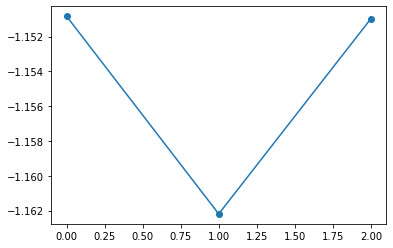

In [214]:
# test best model
print('----------Evaluate Model on Test Set----------')
best_checkpoint = torch.load('/content/drive/My Drive/cgcnn/model_best.pth.tar')
model.load_state_dict(best_checkpoint['state_dict'])

print_prediction(data_loader = data_loader,
                 model = model)

In [85]:
a = next(iter(data_loader))

In [100]:
a[0][0].shape

torch.Size([15, 92])

In [101]:
a[0][1].shape

torch.Size([15, 12, 41])

In [103]:
a[0][2].shape

torch.Size([15, 12])

In [215]:
a[0][2]

tensor([[ 1,  3,  2,  3,  2,  4,  4,  3,  4,  2,  4,  3],
        [ 4,  2,  3,  4,  3,  2,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  4,  3,  4,  3,  0,  4,  0,  3,  0,  4],
        [ 1,  1,  4,  2,  4,  2,  0,  4,  0,  2,  0,  4],
        [ 1,  1,  2,  3,  3,  2,  0,  2,  0,  3,  0,  3],
        [ 8,  7,  8,  7,  9,  9,  8,  9,  7,  9,  8,  7],
        [ 9,  7,  8,  9,  8,  7,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  9,  8,  9,  8,  5,  9,  5,  8,  5,  9],
        [ 6,  6,  9,  7,  9,  7,  5,  9,  5,  7,  5,  9],
        [ 6,  6,  7,  8,  8,  7,  5,  7,  5,  8,  5,  8],
        [13, 12, 13, 12, 14, 14, 13, 14, 12, 14, 13, 12],
        [14, 12, 13, 14, 13, 12, 10, 10, 10, 10, 10, 10],
        [11, 11, 14, 13, 14, 13, 10, 14, 10, 13, 10, 14],
        [11, 11, 14, 12, 14, 12, 10, 14, 10, 12, 10, 14],
        [11, 11, 12, 13, 13, 12, 10, 12, 10, 13, 10, 13]])

In [104]:
a[0][3]

[tensor([0, 1, 2, 3, 4]),
 tensor([5, 6, 7, 8, 9]),
 tensor([10, 11, 12, 13, 14])]

## Conclusion

* energy_per_atom을 target_property로 하여 CGCNN 가동
* 왜 안 돼!